In [5]:
import pandas as pd
file_path = 'C:\\Users\\yaswa\\Downloads\\Walmart_Sales_CB1799BACC_77EAC63B5D.xlsx'
df = pd.read_excel(file_path)


In [7]:
df.head(5)


,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Date,Time,Payment,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,1/5/2019,13:08:00,Ewallet,9.1
1,226-31-3081,A,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3/8/2019,10:29:00,Cash,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,3/3/2019,13:23:00,Credit card,7.4
3,123-19-1176,B,Yangon,Member,Male,Health and beauty,58.22,8,1/27/2019,20:33:00,Ewallet,8.4
4,373-73-7910,C,Yangon,Normal,Male,Sports and travel,86.31,7,2/8/2019,10:37:00,Ewallet,5.3


In [8]:
df['Date'] = pd.to_datetime(df['Date'])

In [10]:
df['Total Sales'] = df['Unit price'] * df['Quantity']

In [11]:
df.head()


,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Date,Time,Payment,Rating,Total Sales
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,2019-01-05,13:08:00,Ewallet,9.1,522.83
1,226-31-3081,A,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,2019-03-08,10:29:00,Cash,9.6,76.40
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,2019-03-03,13:23:00,Credit card,7.4,324.31
3,123-19-1176,B,Yangon,Member,Male,Health and beauty,58.22,8,2019-01-27,20:33:00,Ewallet,8.4,465.76
4,373-73-7910,C,Yangon,Normal,Male,Sports and travel,86.31,7,2019-02-08,10:37:00,Ewallet,5.3,604.17


In [20]:
city_branch_performance = df.groupby(['City', 'Branch'])['Total Sales'].sum().reset_index()

In [25]:
city_branch_performance = city_branch_performance.sort_values(by='Total Sales', ascending=False)
print("Performance of Sales and Revenue at City and Branch Level:\n")
print(city_branch_performance)

Performance of Sales and Revenue at City and Branch Level:

        City Branch  Total Sales
1   Mandalay      B     37215.93
3  Naypyitaw      A     35985.64
7     Yangon      B     35193.51
4  Naypyitaw      B     35157.75
5  Naypyitaw      C     34160.14
0   Mandalay      A     34130.09
6     Yangon      A     33647.27
8     Yangon      C     32302.43
2   Mandalay      C     29794.62


In [27]:
# Group by City and Branch to calculate the average unit price of an item sold
average_price_per_item = df.groupby(['City', 'Branch'])['Unit price'].mean().reset_index()

In [28]:
print("Average Price of Items Sold at Each Branch of the City:\n", average_price_per_item)


Average Price of Items Sold at Each Branch of the City:
         City Branch  Unit price
0   Mandalay      A   53.353866
1   Mandalay      B   56.133305
2   Mandalay      C   57.958316
3  Naypyitaw      A   54.123182
4  Naypyitaw      B   57.785688
5  Naypyitaw      C   57.941009
6     Yangon      A   55.639298
7     Yangon      B   56.011062
8     Yangon      C   52.684602


In [30]:
df['Date'] = pd.to_datetime(df['Date'])  # Ensure Date is in datetime format
df['Month-Year'] = df['Date'].dt.to_period('M')  # Extract Month-Year
df['Total Sales'] = df['Unit price'] * df['Quantity']

In [31]:
#Product analysis
product_line_analysis = df.groupby(['Month-Year', 'Product line'])['Total Sales'].sum().unstack()

In [32]:
# Gender Analysis
gender_analysis = df.groupby(['Month-Year', 'Gender'])['Total Sales'].sum().unstack()

In [37]:
# Payment Method Analysis
payment_method_analysis = df.groupby(['Month-Year', 'Payment'])['Total Sales'].sum().unstack()

In [42]:
df.head()
print(df['Month-Year'].unique())


<PeriodArray>
['2019-01', '2019-03', '2019-02']
Length: 3, dtype: period[M]


In [44]:
april_2019_data = df[df['Month-Year'] == '2019-04']
print(april_2019_data.head())

Empty DataFrame
Columns: [Invoice ID, Branch, City, Customer type, Gender, Product line, Unit price, Quantity, Date, Time, Payment, Rating, Total Sales, Month-Year]
Index: []


In [51]:
print(df['Month-Year'].dtype)

object


In [52]:
print(df['Month-Year'].head())

0    2019-01
1    2019-03
2    2019-03
3    2019-01
4    2019-02
Name: Month-Year, dtype: object


In [53]:
df['Month-Year'] = df['Month-Year'].astype(str)


In [56]:
print(df['Month-Year'].unique())

['2019-01' '2019-03' '2019-02']


In [57]:
april_data = df[df['Month-Year'] == '2019-04']

In [58]:
print(april_data.head())

Empty DataFrame
Columns: [Invoice ID, Branch, City, Customer type, Gender, Product line, Unit price, Quantity, Date, Time, Payment, Rating, Total Sales, Month-Year]
Index: []


In [59]:
april_2019_product_line = product_line_analysis.loc['2019-03']
april_2019_gender = gender_analysis.loc['2019-03']
april_2019_payment_method = payment_method_analysis.loc['2019-03']

In [60]:
print("Product Line Sales for April 2019:\n", april_2019_product_line)
print("\nGender Sales for April 2019:\n", april_2019_gender)
print("\nPayment Method Sales for April 2019:\n", april_2019_payment_method)

Product Line Sales for April 2019:
 Product line
Electronic accessories    17279.37
Fashion accessories       15191.35
Food and beverages        15784.72
Health and beauty         17341.25
Home and lifestyle        19935.99
Sports and travel         18710.66
Name: 2019-03, dtype: float64

Gender Sales for April 2019:
 Gender
Female    49912.75
Male      54330.59
Name: 2019-03, dtype: float64

Payment Method Sales for April 2019:
 Payment
Cash           33038.24
Credit card    29676.64
Ewallet        41528.46
Name: 2019-03, dtype: float64


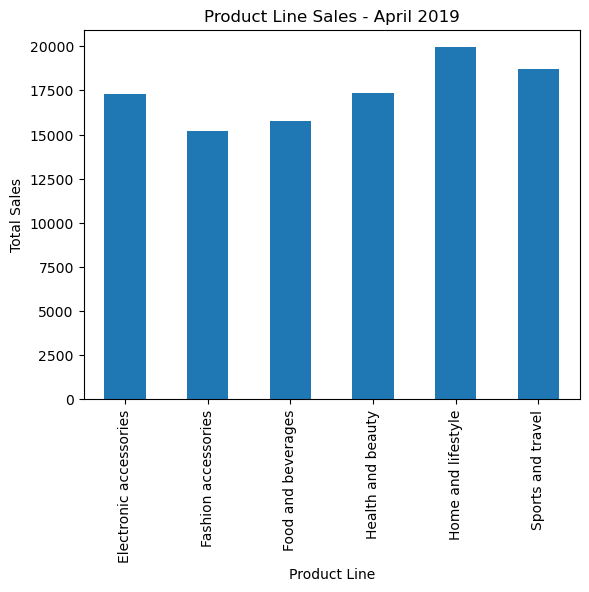

In [61]:
import matplotlib.pyplot as plt
april_2019_product_line.plot(kind='bar', title='Product Line Sales - April 2019')
plt.xlabel('Product Line')
plt.ylabel('Total Sales')
plt.show()

In [63]:
monthly_sales = df.groupby('Month-Year')['Total Sales'].sum().reset_index()

In [64]:
monthly_sales['MoM Change (%)'] = monthly_sales['Total Sales'].pct_change() * 100

In [65]:
print(monthly_sales)

  Month-Year  Total Sales  MoM Change (%)
0    2019-01    110754.16             NaN
1    2019-02     92589.88      -16.400540
2    2019-03    104243.34       12.586106


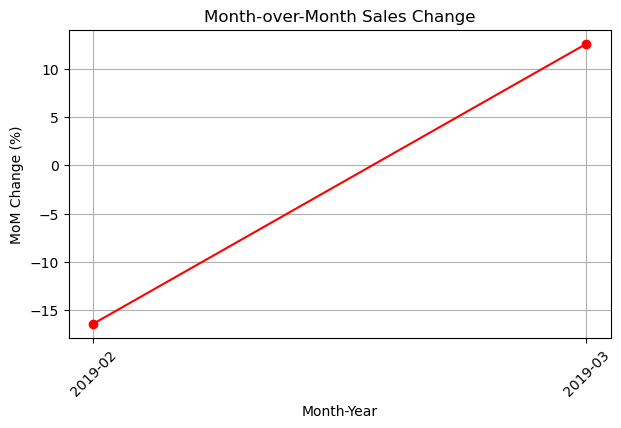

In [76]:
import matplotlib.pyplot as plt

# Plotting Month-over-Month changes
plt.figure(figsize=(7,4))
plt.plot(monthly_sales['Month-Year'].astype(str), monthly_sales['MoM Change (%)'], marker='o', linestyle='-', color='r')
plt.title('Month-over-Month Sales Change')
plt.xlabel('Month-Year')
plt.ylabel('MoM Change (%)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()